<a href="https://colab.research.google.com/github/PideurM/Radiology-CT-Scan-classification/blob/main/Classification_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.2MB/s 
     |████████████████████████████████| 194kB 18.8MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 1.2MB 26.5MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 12.8MB 250kB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', '#Insert Azure Key')

In [ ]:
results = search_images_bing(key, 'pneumothorax radiology')
ims = results.attrgot('content_url')
len(ims)

150

In [ ]:
ims = ['http://www.svuhradiology.ie/wp-content/uploads/2015/04/tensionptx.jpg']

In [ ]:
ims[0]

'http://www.svuhradiology.ie/wp-content/uploads/2015/04/tensionptx.jpg'

In [ ]:
import os 
os.mkdir('images')

In [ ]:
dest = 'images/pneumothorax.jpg'
download_url(ims[0], dest)

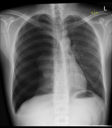

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
radio_types = ['pneumothorax','pericardial effusion','stroke']
path = Path('radiology')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in radio_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} radiology')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#404) [Path('radiology/stroke/00000106.png'),Path('radiology/stroke/00000036.jpg'),Path('radiology/stroke/00000064.jpg'),Path('radiology/stroke/00000050.jpg'),Path('radiology/stroke/00000021.png'),Path('radiology/stroke/00000078.jpg'),Path('radiology/stroke/00000004.JPG'),Path('radiology/stroke/00000118.png'),Path('radiology/stroke/00000027.png'),Path('radiology/stroke/00000094.jpeg')...]

In [ ]:
dest = (path/'pericardial effusion')
dest.mkdir(exist_ok=True)
results = search_images_bing(key, 'pericardial effusion radiology')
download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
dest = (path/'stroke')
dest.mkdir(exist_ok=True)
results = search_images_bing(key, 'stroke radiology')
download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#532) [Path('radiology/pericardial effusion/00000019.png'),Path('radiology/pericardial effusion/00000100.jpg'),Path('radiology/pericardial effusion/00000137.JPG'),Path('radiology/pericardial effusion/00000123.png'),Path('radiology/pericardial effusion/00000094.jpg'),Path('radiology/pericardial effusion/00000076.jpg'),Path('radiology/pericardial effusion/00000141.jpg'),Path('radiology/pericardial effusion/00000044.jpg'),Path('radiology/pericardial effusion/00000009.png'),Path('radiology/pericardial effusion/00000013.JPG')...]

In [ ]:
failed = verify_images(fns)
failed

(#5) [Path('radiology/stroke/00000036.jpg'),Path('radiology/stroke/00000052.jpg'),Path('radiology/pneumothorax/00000088.jpg'),Path('radiology/pneumothorax/00000133.jpg'),Path('radiology/pneumothorax/00000146.jpg')]

In [ ]:
failed.map(Path.unlink);

In [ ]:
radiology = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = radiology.dataloaders(path)

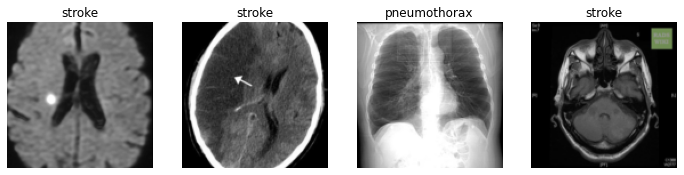

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

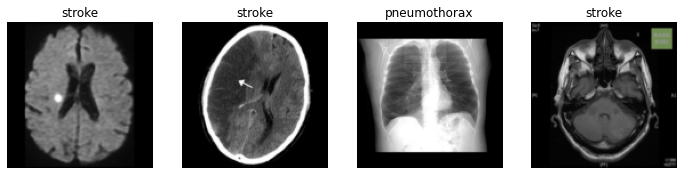

In [ ]:
radiology = radiology.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = radiology.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


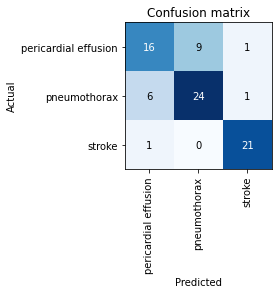

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

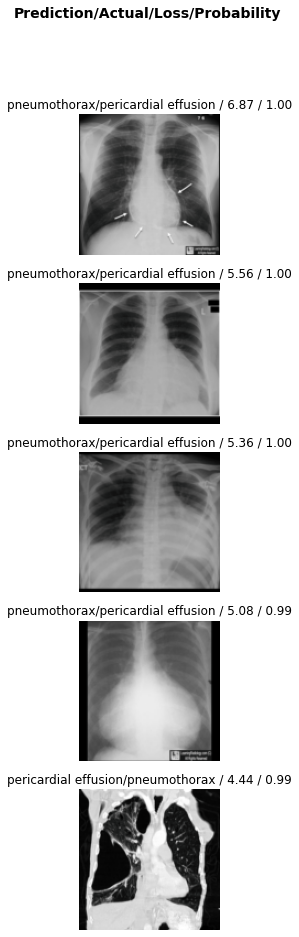

In [ ]:
interp.plot_top_losses(5, nrows=5)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/pneumothorax.jpg')

('pneumothorax', tensor(1), tensor([9.8312e-07, 1.0000e+00, 3.2116e-07]))

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 


     |████████████████████████████████| 2.5MB 9.1MB/s 
     |████████████████████████████████| 378kB 52.9MB/s 
     |████████████████████████████████| 122kB 56.3MB/s 
     |████████████████████████████████| 552kB 26.0MB/s 
     |████████████████████████████████| 71kB 11.1MB/s 
     |████████████████████████████████| 430kB 57.2MB/s 
ERROR: nbdev 1.1.14 has requirement jupyter-client<=6.1.12, but you'll have jupyter-client 6.2.0 which is incompatible.
ERROR: nbdev 1.1.14 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Found existing installation: nbconvert 5.

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
